## Author: Zecheng Chang  
## Course: HUDK 4050, Analysis Challenge Assignment 4

In [37]:
import networkx as nx
import matplotlib.pyplot as plt
import tweepy
import pandas as pd

In [75]:
data = pd.read_csv('wiki-Vote.txt',sep='\t',skiprows=3,header=0)

In [77]:
data.columns = ['FromNodeID','ToNodeID']

In [78]:
data.head(3)

,FromNodeID,ToNodeID
0,30,1412
1,30,3352
2,30,5254


### Data Background

This is a dataset I found from [Stanford Large Network Dataset Collection](https://snap.stanford.edu/data).    
It's a dataset about [Wikipedia](https://en.wikipedia.org/wiki/Main_Page)'s vote history, Wikipedia is a free encyclopedia written by contributors around the world. Among those contributors, some are also administrators who are responsible for the maintenance work of Wikipedia. In order to became a administrator, there must be a vote from the contributors. This dataset is a record of the vote history took place before.


The dataset contains 2 featurs, `FromNodeID` and `ToNodeID`, it is very intuitive to understand what does the feature represent to. A user ID voted for another user ID.  

**Node**: A user / User ID  
**Edge**: (A user) vote to (Another user)  

Notice: This is a directed social network.

In [221]:
# initial a Graph
G = nx.Graph()

In [226]:
# since this is a very large dataset I can't plot all of them, I only include top 50 edges in the graph
test_data = data.iloc[0:50,]

In [223]:
# make the edges to be a list of tuples
edges = []

for i, row in test_data.iterrows():
    from_ID = row['FromNodeID']
    to_ID = row['ToNodeID']
    edges.append(tuple([from_ID, to_ID]))



In [224]:
# get nodes
to_id_unique = test_data['ToNodeID'].unique().tolist()
from_id_unique = test_data['FromNodeID'].unique().tolist()
for user_id in to_id_unique:
    from_id_unique.append(user_id)
    
unique_set = set(from_id_unique)    
nodes_list = list(unique_set)

/Users/czc/opt/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


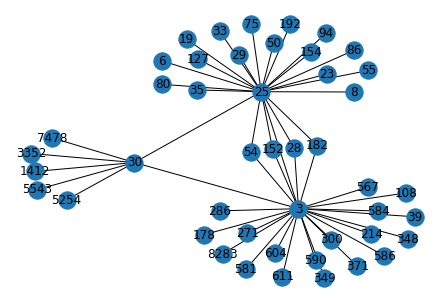

In [225]:
G.add_nodes_from(nodes_list)
G.add_edges_from(edges)
nx.draw(G, with_labels = True)

### Describe the global network properties

In [187]:
# number of all vertices
all_to_id_unique = data['ToNodeID'].unique().tolist()
all_from_id_unique = data['FromNodeID'].unique().tolist()
for user_id in all_to_id_unique:
    all_from_id_unique.append(user_id)
    
all_unique_set = set(all_from_id_unique)    
all_nodes_list = list(all_unique_set)

len(all_nodes_list)

7115

There are 7115 nodes, every user (contributer) is a node

In [188]:
# number of all the edges
len(data)

103689

There are 103689 edges, means therea are 103689 votes were made, also this a directed graph, although it's not very clear on the graph, but from the description of the data we can tell it's a directed network. The graph's density is relatively large and has a relatively smaller diameter. I think this is because there is a smaller population, comparing to the population size of all the contributors, for them to vote for. Whoever got voted must has very hign reputation.

In [189]:
len(data['ToNodeID'].unique().tolist())

2381

There are 2381 contributers had been voted, but there are 7115 contributors in total. So, roughly 1/3 of the contributer had been voted for.

In [207]:
# user id 4037 had the most votes 457
data['ToNodeID'].value_counts().head(10)

4037    457
15      361
2398    340
2625    331
1297    309
2565    274
762     272
2328    266
5254    265
3352    264
Name: ToNodeID, dtype: int64

In [208]:
# most the contributors had only one vote in total (maybe they vote to themselves)
data['ToNodeID'].value_counts().tail(10)

4521    1
4168    1
7495    1
3708    1
3205    1
7708    1
6983    1
2679    1
6791    1
2678    1
Name: ToNodeID, dtype: int64

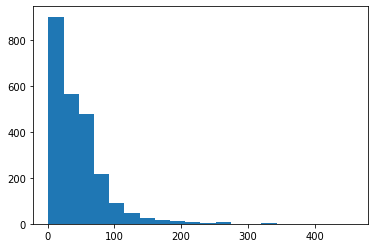

In [203]:
plt.hist(data['ToNodeID'].value_counts(),bins=20);

From the this plot we can have more believe on this point, only a small amount of people had the most of the votes.

In [211]:
num_votes = data['ToNodeID'].value_counts().tolist()

In [218]:
top_10_per_votes = num_votes[:500]

In [219]:
sum(top_10_per_votes)/ sum(num_votes)

0.5017118498587121

### Top 20% people got 50% of the votes

In [238]:
# calculate the closeness centrality and sort by value
sorted(nx.closeness_centrality(G).items(), key=lambda item: item[1],reverse=True)[:3]

[(3, 0.6818181818181818), (25, 0.6617647058823529), (30, 0.5421686746987951)]

These 3 nodes have the highest closeness centrality.

In [241]:
# calculate the degree centrality and sort by value
sorted(nx.degree_centrality(G).items(), key=lambda item: item[1],reverse=True)[:3]

[(3, 0.5333333333333333), (25, 0.48888888888888893), (30, 0.15555555555555556)]

The same 3 nodes have the highest degree centrality.

In [243]:
# calculate the betweenness centrality and sort by value
sorted(nx.betweenness_centrality(G).items(), key=lambda item: item[1],reverse=True)[:3]

[(3, 0.6606060606060606), (25, 0.6050505050505051), (30, 0.21212121212121213)]

The same 3 nodes have the highest betweenness centrality.

### Community Detection
From the graph we can easily see that there are 3 small communites who are "controled" by contributor 30, 25, and 3  
They are like 3 clusters inside the graph and 30,25 and 3 are the centroids.  
Within these there communities, their densities are relatively large comparing to other possible groups.

**Important cases:**  
I feel that the node 30 is very important because it connected to the other 2 centroids directly. 

# Conclussion

From this network, we can detect that some of the contributors are controlling this communities, they are like the influencer on social medias, however, I'm not say this is bad, these contributors, who because administrators, are people truly have high reputation because of their authorities on some subjects. 